#Лабораторная работа №1 (мат.стат)

## 1. Создание случайного набора чисел (размера 300)

In [415]:
# Библиотеки для генерация случайных чисел
import numpy as np
from numpy import random

# Для n!
import math

# Для нахождения моды
from scipy import stats

# Библиотека для визуализации
import matplotlib.pyplot as plt

### 1.1 С нормальным распределением

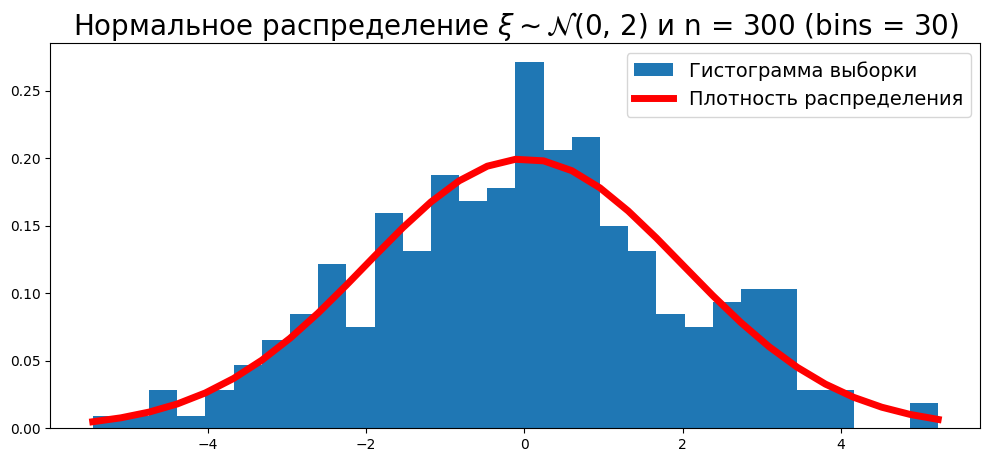

In [416]:
m = 0 # Среднее
sd = 2 # Стандартное отклонение
n = 300 # размер выборки
_bins = 30 # количество разбиений

# Создание набора чисел с нормальным распределением (от m и sd размера 300)
normal_data = np.random.normal(m, sd, n)

# Размер графика
plt.figure(figsize=(12, 5))

# Построение гистрограммы для нашей выборки (нормализованной от 0 до 1)
count, normal_bins, ignored = plt.hist(normal_data, bins=_bins, density=True,
                          label='Гистограмма выборки')

# Построение плотности распределения нашей выборки

normal_y = 1/(sd * np.sqrt(2 * np.pi)) * np.exp( - (normal_bins - m)**2 / (2 * sd**2) ) # плотность распределения

plt.plot(normal_bins, normal_y,
         color='red',
         lw=5, label='Плотность распределения')

# Вывод графика
plt.title(r'Нормальное распределение $\xi \sim \mathcal{N}$' + f'({m}, {sd})' + f' и n = {n} (bins = {_bins})', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

### 1.2 С распределением Пуассона

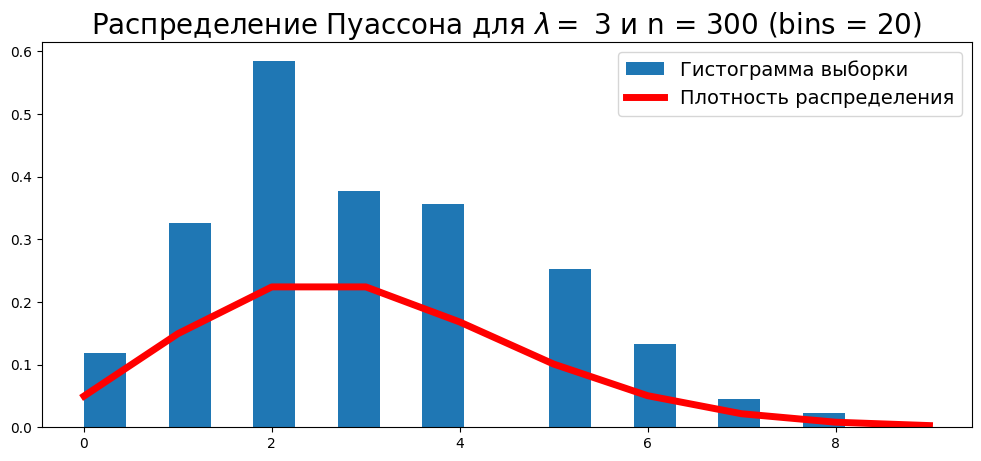

In [417]:
_lambda = 3 # lambda
n = 300 # размер выборки
_bins = 20 # количество разбиений

# Создание набора чисел с распределением Пуассона (от lambda размера 300)
poisson_data = np.random.poisson(_lambda, 300)

# Размер графика
plt.figure(figsize=(12, 5))

# Построение гистрограммы для нашей выборки (нормализованной от 0 до 1)
count, bins, ignored = plt.hist(poisson_data, bins=_bins, density=True,
                          label='Гистограмма выборки')

# Построение плотности распределения нашей выборки
poisson_round_bins = np.unique(np.array([int(i) for i in np.round(bins)])) # округление значений для подсчета k!

poisson_y = _lambda ** poisson_round_bins * np.exp(-_lambda) / np.array([math.factorial(i) for i in poisson_round_bins]) # плотность распределения

plt.plot(poisson_round_bins, poisson_y,
         color='red',
         lw=5, label='Плотность распределения')

# Вывод графика
plt.title(f'Распределение Пуассона для $\lambda = $ {_lambda} и n = {n} (bins = {_bins})', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

### 1.3 С биномиальным распределением

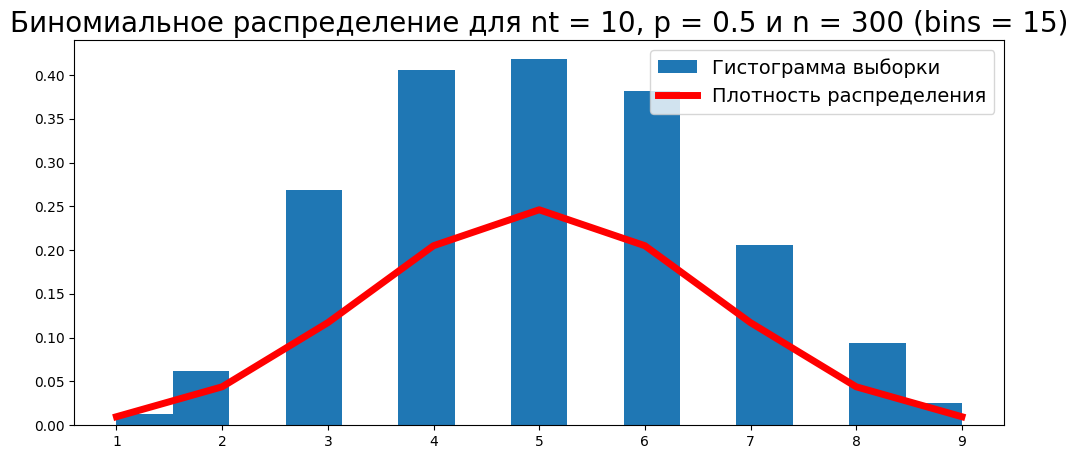

In [422]:
n_trials = 10 # количество испытаний
prob_success = 0.5 # вероятность успеха
n = 300 # размер выборки
_bins = 15 # количество разбиений

# Создание набора чисел с биномиальным распределением (от n_trials и prob_success размера 300)
binomial_data = np.random.binomial(n_trials, prob_success, n)

# Размер графика
plt.figure(figsize=(12, 5))

# Построение гистрограммы для нашей выборки (нормализованной от 0 до 1)
count, bins, ignored = plt.hist(binomial_data, bins=_bins, density=True,
                          label='Гистограмма выборки')

# Построение плотности распределения нашей выборки
binomial_round_bins = np.unique(np.array([int(i) for i in np.round(bins)])) # округление значений для подсчета k!

divider = np.array([math.factorial(i) for i in binomial_round_bins]) * np.array([math.factorial(n_trials - i) for i in binomial_round_bins]) # k! * (n_trials - k)!

binomial_y = math.factorial(n_trials) * prob_success ** binomial_round_bins * (1 - prob_success) ** (n_trials - binomial_round_bins) / divider # плотность распределения

plt.plot(binomial_round_bins, binomial_y,
         color='red',
         lw=5, label='Плотность распределения')


# Вывод графика
plt.title(f'Биномиальное распределение для nt = {n_trials}, p = {prob_success} и n = {n} (bins = {_bins})', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

## 2. Описательные статистики

### Функция для вывода статистики по набору данных

In [423]:
def data_stats(data: np.array, _str: str) -> None:
    mean = np.round(np.mean(data), 2) # Среднее
    median = np.round(np.median(data), 2) # Медиана
    mode = np.round(stats.mode(data)[0], 2) # Мода
    variance = np.round(np.var(data), 2) # Дисперсия
    standard_deviation = np.round(np.std(data), 2) # стандартное отклонение
    print(f'''
              Статистики для {_str} \n
              Среднее   : {mean}
              Медиана   : {median}
              Мода      : {mode}
              Дисперсия : {variance}
              Стандартное отклонение : {standard_deviation}
          ''')


### 2.1 Для нормального распределения

In [424]:
data_stats(normal_data, f'Нормального распределения, где m = {m}, sd = {sd}')


              Статистики для Нормального распределения, где m = 0, sd = 2 

              Среднее   : -0.04 
              Медиана   : 0.01
              Мода      : -5.45
              Дисперсия : 3.85
              Стандартное отклонение : 1.96
          


### 2.2 Для распределения Пуассона

In [425]:
data_stats(poisson_data, f'распределения Пуассона, где lambda = {_lambda}')


              Статистики для распределения Пуассона, где lambda = 3 

              Среднее   : 3.0 
              Медиана   : 3.0
              Мода      : 2
              Дисперсия : 3.17
              Стандартное отклонение : 1.78
          


### 2.3 Для биномиального распределения

In [426]:
data_stats(binomial_data, f'биномиального распределения, где n_trials = {n_trials}, prob_success = {prob_success}')


              Статистики для биномиального распределения, где n_trials = 10, prob_success = 0.5 

              Среднее   : 5.0 
              Медиана   : 5.0
              Мода      : 5
              Дисперсия : 2.5
              Стандартное отклонение : 1.58
          


## 3. Построение набора гистограмм для разных интервалов

### 3.1 Для нормального распределения

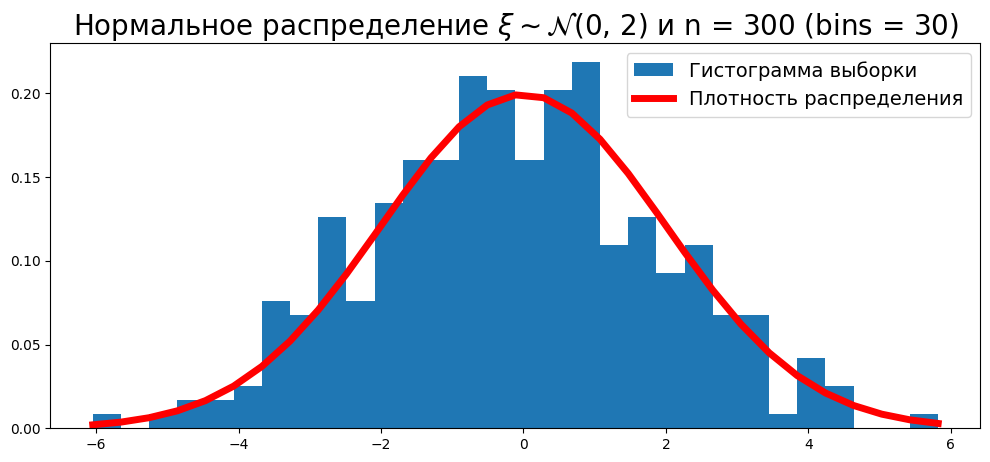

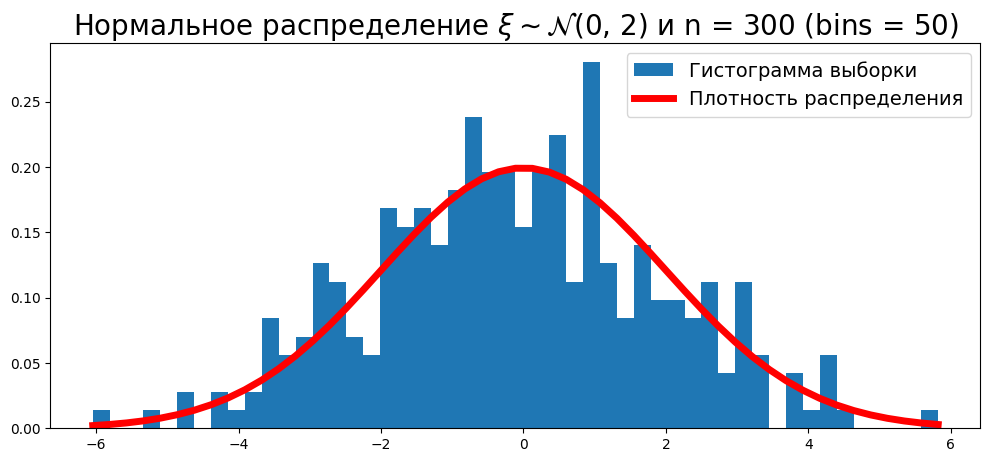

In [427]:
m = 0 # Среднее
sd = 2 # Стандартное отклонение
n = 300 # размер выборки

_bins = 30 # количество разбиений 1
_bins_1 = 50 # количество разбиений 2

# Создание набора чисел с нормальным распределением (от m и sd размера 300)
normal_data = np.random.normal(m, sd, n)

# Размер графика
plt.figure(figsize=(12, 5))

# Построение гистрограммы для нашей выборки (нормализованной от 0 до 1, bins = 30)
count, normal_bins, ignored = plt.hist(normal_data, bins=_bins, density=True,
                          label='Гистограмма выборки')

# Построение плотности распределения нашей выборки

normal_y = 1/(sd * np.sqrt(2 * np.pi)) * np.exp( - (normal_bins - m)**2 / (2 * sd**2) ) # плотность распределения

plt.plot(normal_bins, normal_y,
         color='red',
         lw=5, label='Плотность распределения')

# Вывод графика
plt.title(r'Нормальное распределение $\xi \sim \mathcal{N}$' + f'({m}, {sd})' + f' и n = {n} (bins = {_bins})', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()


# Размер графика
plt.figure(figsize=(12, 5))

# Построение гистрограммы для нашей выборки (нормализованной от 0 до 1, bins = 50)
count, normal_bins, ignored = plt.hist(normal_data, bins=_bins_1, density=True,
                          label='Гистограмма выборки')

# Построение плотности распределения нашей выборки

normal_y = 1/(sd * np.sqrt(2 * np.pi)) * np.exp( - (normal_bins - m)**2 / (2 * sd**2) ) # плотность распределения

plt.plot(normal_bins, normal_y,
         color='red',
         lw=5, label='Плотность распределения')

# Вывод графика
plt.title(r'Нормальное распределение $\xi \sim \mathcal{N}$' + f'({m}, {sd})' + f' и n = {n} (bins = {_bins_1})', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

### 3.2 Для распределения Пуассона

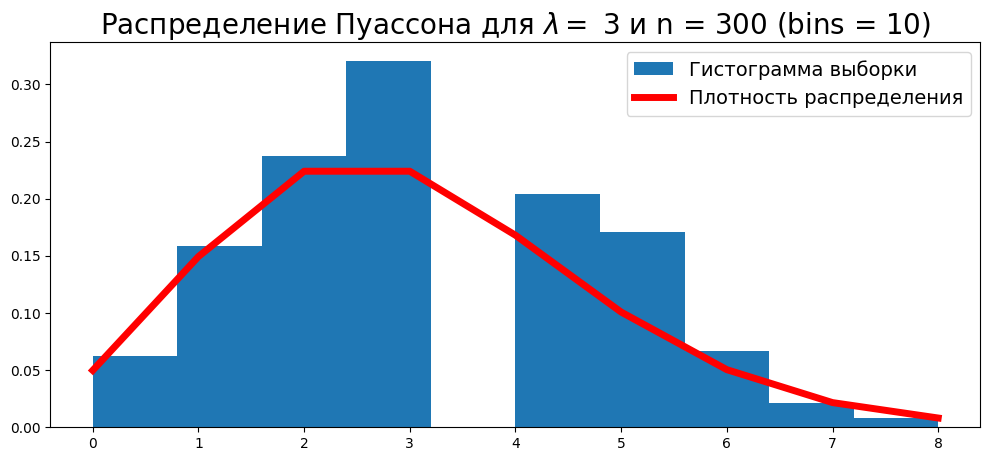

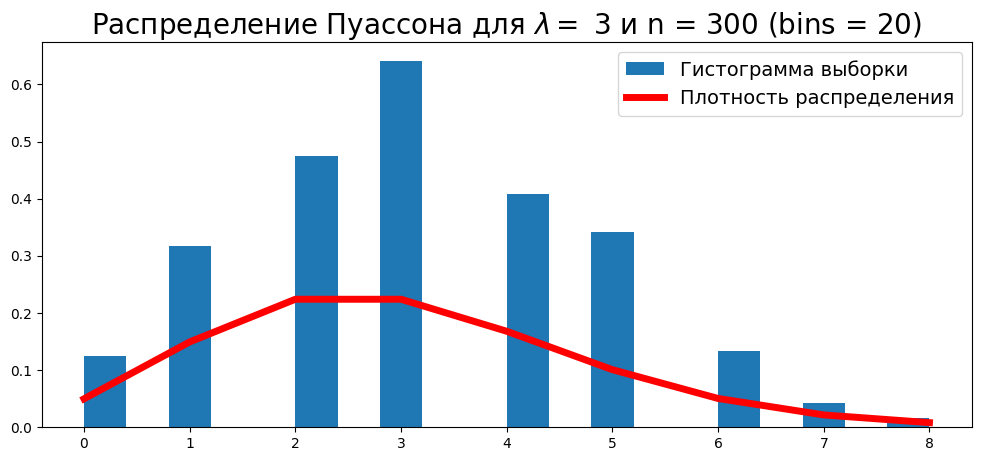

In [428]:
_lambda = 3 # lambda
n = 300 # размер выборки
_bins = 10 # количество разбиений 1
_bins_1 = 20 # количество разбиений

# Создание набора чисел с распределением Пуассона (от lambda размера 300)
poisson_data = np.random.poisson(_lambda, 300)

# Размер графика
plt.figure(figsize=(12, 5))

# Построение гистрограммы для нашей выборки (нормализованной от 0 до 1)
count, bins, ignored = plt.hist(poisson_data, bins=_bins, density=True,
                          label='Гистограмма выборки')

# Построение плотности распределения нашей выборки
poisson_round_bins = np.unique(np.array([int(i) for i in np.round(bins)])) # округление значений для подсчета k!

poisson_y = _lambda ** poisson_round_bins * np.exp(-_lambda) / np.array([math.factorial(i) for i in poisson_round_bins]) # плотность распределения

plt.plot(poisson_round_bins, poisson_y,
         color='red',
         lw=5, label='Плотность распределения')

# Вывод графика
plt.title(f'Распределение Пуассона для $\lambda = $ {_lambda} и n = {n} (bins = {_bins})', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()


# Размер графика
plt.figure(figsize=(12, 5))

# Построение гистрограммы для нашей выборки (нормализованной от 0 до 1)
count, bins, ignored = plt.hist(poisson_data, bins=_bins_1, density=True,
                          label='Гистограмма выборки')

# Построение плотности распределения нашей выборки
poisson_round_bins = np.unique(np.array([int(i) for i in np.round(bins)])) # округление значений для подсчета k!

poisson_y = _lambda ** poisson_round_bins * np.exp(-_lambda) / np.array([math.factorial(i) for i in poisson_round_bins]) # плотность распределения

plt.plot(poisson_round_bins, poisson_y,
         color='red',
         lw=5, label='Плотность распределения')

# Вывод графика
plt.title(f'Распределение Пуассона для $\lambda = $ {_lambda} и n = {n} (bins = {_bins_1})', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

### 3.3 Для биномиального распределения

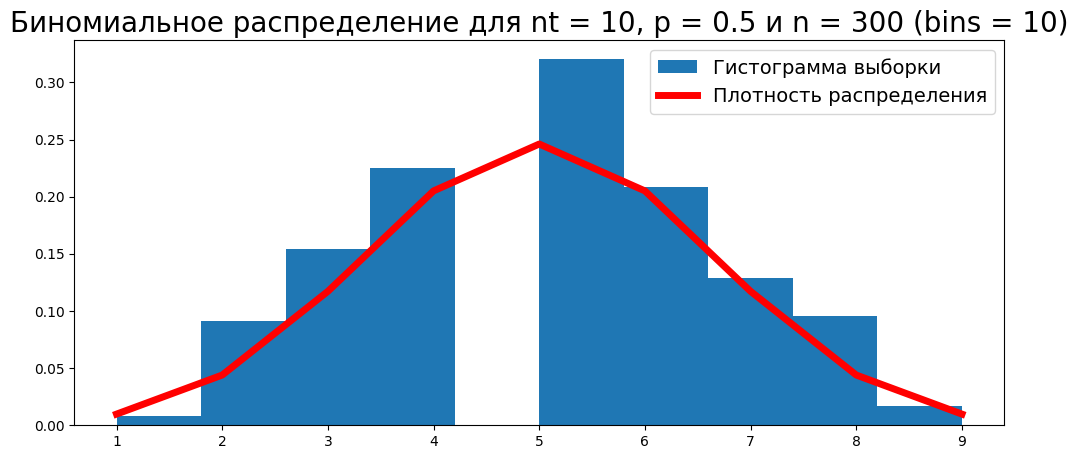

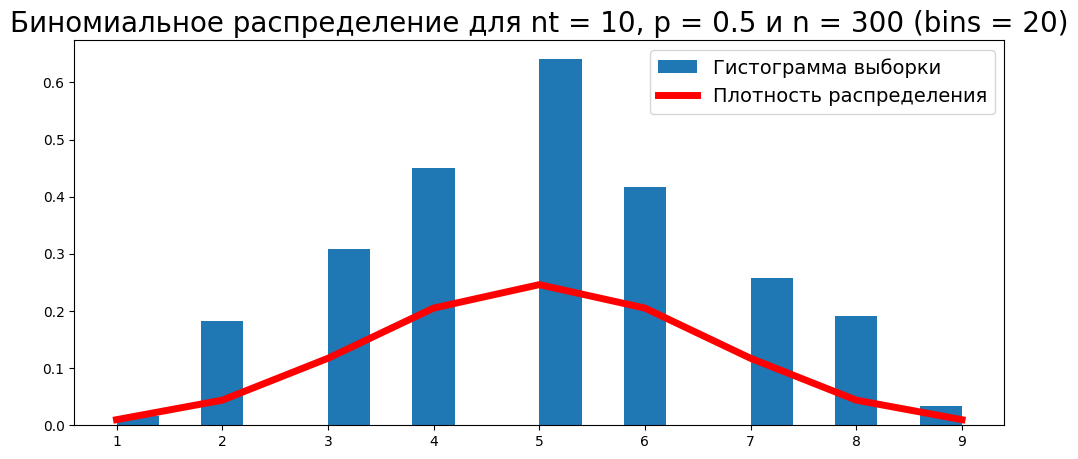

In [429]:
n_trials = 10 # количество испытаний
prob_success = 0.5 # вероятность успеха
n = 300 # размер выборки
_bins = 10 # количество разбиений 1
_bins_1 = 20 # количество разбиений

# Создание набора чисел с биномиальным распределением (от n_trials и prob_success размера 300)
binomial_data = np.random.binomial(n_trials, prob_success, n)

# Размер графика
plt.figure(figsize=(12, 5))

# Построение гистрограммы для нашей выборки (нормализованной от 0 до 1)
count, bins, ignored = plt.hist(binomial_data, bins=_bins, density=True,
                          label='Гистограмма выборки')

# Построение плотности распределения нашей выборки
binomial_round_bins = np.unique(np.array([int(i) for i in np.round(bins)])) # округление значений для подсчета k!

divider = np.array([math.factorial(i) for i in binomial_round_bins]) * np.array([math.factorial(n_trials - i) for i in binomial_round_bins]) # k! * (n_trials - k)!

binomial_y = math.factorial(n_trials) * prob_success ** binomial_round_bins * (1 - prob_success) ** (n_trials - binomial_round_bins) / divider # плотность распределения

plt.plot(binomial_round_bins, binomial_y,
         color='red',
         lw=5, label='Плотность распределения')


# Вывод графика
plt.title(f'Биномиальное распределение для nt = {n_trials}, p = {prob_success} и n = {n} (bins = {_bins})', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()


# Размер графика
plt.figure(figsize=(12, 5))

# Построение гистрограммы для нашей выборки (нормализованной от 0 до 1)
count, bins, ignored = plt.hist(binomial_data, bins=_bins_1, density=True,
                          label='Гистограмма выборки')

# Построение плотности распределения нашей выборки
binomial_round_bins = np.unique(np.array([int(i) for i in np.round(bins)])) # округление значений для подсчета k!

divider = np.array([math.factorial(i) for i in binomial_round_bins]) * np.array([math.factorial(n_trials - i) for i in binomial_round_bins]) # k! * (n_trials - k)!

binomial_y = math.factorial(n_trials) * prob_success ** binomial_round_bins * (1 - prob_success) ** (n_trials - binomial_round_bins) / divider # плотность распределения

plt.plot(binomial_round_bins, binomial_y,
         color='red',
         lw=5, label='Плотность распределения')


# Вывод графика
plt.title(f'Биномиальное распределение для nt = {n_trials}, p = {prob_success} и n = {n} (bins = {_bins_1})', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()